# Smoothness

## p7: accuracy of periodic spectral differentiation

In [1]:
using LinearAlgebra,LaTeXStrings
N = 6:2:50
@assert(all(iseven.(N)),"N must be even")

# Compute derivatives for various values of N:
Nmax = maximum(N)
data = [ 
    # uʹʹʹ in BV
    (x -> abs(sin(x))^3,  x -> 3 * sin(x) * cos(x) * abs(sin(x)), 
        L"|\sin(x)|^3"), 
    # C-infinity
    (x -> exp(-sin(x / 2)^(-2)), 
        x -> 0.5exp(-sin(x / 2)^(-2)) * sin(x) / sin(x / 2)^4, 
        L"\exp(-\sin^{-2}(x/2))"), 
    # analytic in a strip
    (x -> 1 / (1 + sin(x / 2)^2), 
        x -> -sin(x / 2) * cos(x / 2) / (1 + sin(x / 2)^2)^2,
        L"1/(1+\sin^2(x/2))" ),
    # band-limited 
    (x -> sin(10x), x -> 10cos(10x),  L"\sin(10x)")
]

results = []
for (i, (fun,deriv,title)) in enumerate(data)
    E = zeros(length(N))
    for (k,N) in enumerate(N)
        h = 2π / N
        x = h * (1:N)
        entry(k) = k==0 ? 0.0 : 0.5 * (-1)^k * cot(k * h / 2)
        D = [ entry(mod(i-j, N)) for i in 1:N, j in 1:N ]
        E[k] = norm(D*fun.(x) - deriv.(x), Inf)
    end
    push!(results, (;E, title))
end

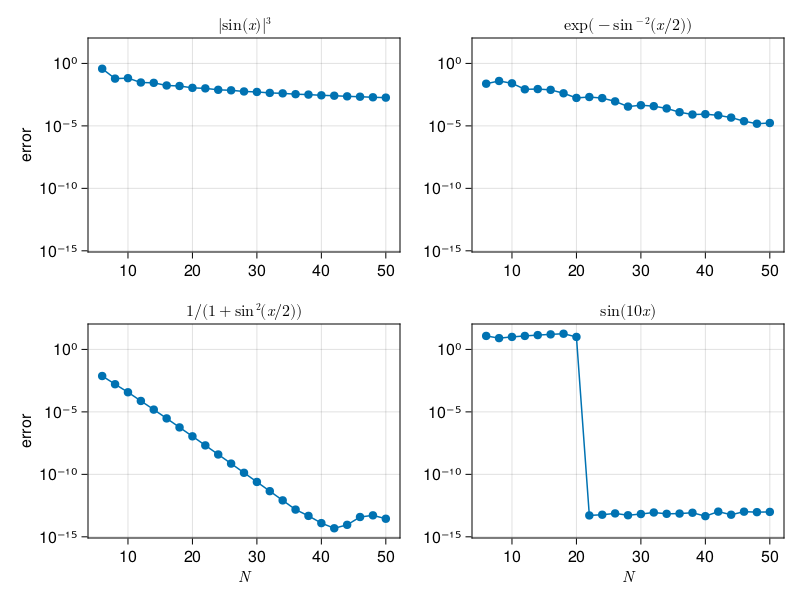

In [2]:
using CairoMakie

fig = Figure()
ax = [ Axis(fig[j,i], yscale=log10) for i in 1:2, j in 1:2 ]
for (ax,r) in zip(vec(ax),results)
    ax.title = r.title
    scatterlines!(ax, N, r.E)
end
linkxaxes!(ax...)
linkyaxes!(ax...)
ax[1,1].ylabel = ax[1,2].ylabel = "error"
ax[1,2].xlabel = ax[2,2].xlabel = L"N"
fig

## p8: eigenvalues of harmonic oscillator uʹʹ + x² u on ℝ

In [3]:
using PrettyTables

N = 6:6:36
L = 8                             # domain is [-L L], periodic
λ = zeros(4,0)
for N in N
    h = 2π / N
    x = [ (L/π)*(i*h - π) for i in 1:N ]
    entry(k) = k==0 ? -π^2 / 3h^2 - 1/6 : -0.5 * (-1)^k / sin(h * k / 2)^2
    D² = [(π / L)^2 * entry(mod(i-j, N)) for i in 1:N, j in 1:N]  # 2nd-order differentiation
    λ = [ λ eigvals(-D² + diagm(x .^ 2))[1:4] ]
end
header = ["N = $n" for n in N]
pretty_table(λ; header, formatters=ft_printf("%.14f"))

┌───────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┐
│             N = 6 │           N = 12 │           N = 18 │           N = 24 │           N = 30 │           N = 36 │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│  0.46147291699547 │ 0.97813728129861 │ 0.99997000149932 │ 0.99999999762906 │ 1.00000000000002 │ 1.00000000000000 │
│  7.49413462105052 │ 3.17160532064718 │ 3.00064406679583 │ 3.00000009841089 │ 3.00000000000075 │ 2.99999999999999 │
│  7.72091605300656 │ 4.45593529116678 │ 4.99259532440771 │ 4.99999796527330 │ 4.99999999997561 │ 5.00000000000000 │
│ 28.83248377834011 │ 8.92452905811993 │ 7.03957189798149 │ 7.00002499815656 │ 7.00000000050865 │ 7.00000000000001 │
└───────────────────┴──────────────────┴──────────────────┴──────────────────┴──────────────────┴──────────────────┘
